# Context
Credit risks refer to the risks of loss on a debt that occurs when the borrower fails to repay the principal and related interest amounts of a loan back to the lender on due dates.



When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision for its approval or rejection. There are two types of risks associated with this decision:

* If the applicant has good credit risk, i.e. is likely to repay the loan, then rejecting the loan results in a loss to the bank
* If the applicant has bad credit risk, i.e. is unlikely to repay the loan, then approving the loan results in a loss to the bank
It may be assumed that the second risk is a greater risk, as the bank (or any other institution lending the money to an untrustworthy party) had a higher chance of not being paid back the borrowed amount.

So it's on the part of the bank or other lending authority to evaluate the risks associated with lending money to a customer.

# Hackathon Link
https://dphi.tech/practice/challenge/38#problem

# Problem Statement
Imagine a bank in your locality. The bank has realized that applying data science methodologies can help them focus their resources efficiently, make smarter decisions on credit risk calculations, and improve performance.

Earlier they used to check the credit risk of the loan applicants manually by analyzing their bank-related data, which used to take months of time. But this time they want a smart data scientist who can automate this process.

# Objective
You are required to build a machine learning model that helps you predict the credit risk of the loan applicants.

# Evaluation Criteria
Submissions are evaluated using Accuracy Score.

# Data Description
There are 20 attributes in the dataset. Some of them are mentioned below:

1. checking_status: Status of the existing checking account
2. duration: Duration in month
3. credit_history: Credit history of the applicant
4. purpose: Purpose of taking the earlier loans
5. employment: Present employment since
6. installment_commitment: Installment rate in percentage of disposable income
7. personal_status: Personal status and sex
8. other_parties: Other debtors/guarantors
9. residence_since: Present residence since
10. other_payment_plans: Other installment plans
11. existing_credits: Number of existing credits at this bank
12. class: The target variable(good, bad)

In [667]:
#import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [668]:
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [669]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


# Data Preprocessing

In [670]:
# checking Unique Values for each Column
for col in audit_data.columns:
    print(col,':',audit_data[col].nunique())
    print(audit_data[col].unique())
    print('---'*3)

checking_status : 4
["'no checking'" "'<0'" "'0<=X<200'" "'>=200'"]
---------
duration : 32
[18 24 36 15 21 12 48  9  4 45 30  7  6 42  8 10 39 20  5 27 11 60 33 14
 28 13 40 47 22 16 54 26]
---------
credit_history : 5
["'critical/other existing credit'" "'existing paid'"
 "'no credits/all paid'" "'all paid'" "'delayed previously'"]
---------
purpose : 10
['radio/tv' 'repairs' 'education' 'furniture/equipment' 'business'
 "'used car'" "'new car'" 'retraining' 'other' "'domestic appliance'"]
---------
credit_amount : 751
[ 1800  2439  2613  4623  3599  5801  2659  4844  7814  2462  3617  6758
  3621   458  2923  3590  1131  1544  2825  1845  6948  1240  1037  9960
  1474  1295  1313  1842  2910  2022  1239  4811  4280   339  3181   730
  4308  1740 12612  2375   428  2991   959  6568  1919  1200  2600  1409
  4351  1498  1449  1282  4675  4370  5096  1526  4473   590  1414  3835
  1533   929   683  3914  1249  2647  6615  3398  8072  1330  1264  7166
  1103  5771  2503   571  6199  135

In [671]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encod_list=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

for col in label_encod_list:
    lenc=LabelEncoder()
    audit_data[col]=lenc.fit_transform(audit_data[col])
    test_data[col]=lenc.transform(test_data[col])
    
audit_data['class']=lenc.fit_transform(audit_data['class'])

In [672]:
# checking for null values
audit_data.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [673]:
# checking for Duplicates
audit_data.duplicated().sum()

0

In [674]:
# checking whether Dataset is balanced or not
audit_data['class'].value_counts(normalize=True)

1    0.7
0    0.3
Name: class, dtype: float64

In [675]:
drop_col=['class']
col_need=['checking_status', 'duration','savings_status','other_payment_plans']

In [676]:
# assigning X and y
X=audit_data.drop(drop_col,axis=1)
#X=audit_data[col_need]
y=audit_data['class']

# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, stratify=y,random_state=36)

# XGB classifier
import xgboost as xgb
clf= xgb.XGBClassifier(objective='reg:logistic',seed=36)

# GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,200,500],'max_depth':[3,5,7] ,'eta':[0.1,0.01,0.001]}
clf_cv=GridSearchCV(clf,cv=3,param_grid=param_grid,verbose=True,n_jobs=-1,scoring='accuracy')

clf_cv.fit(X_train,y_train)
y_predict=clf_cv.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

print(cm)
print(clf_cv.best_params_)
print(clf_cv.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of  81 | elapsed:    5.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.4s finished


[[22 26]
 [14 98]]
{'eta': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.7484387111871645


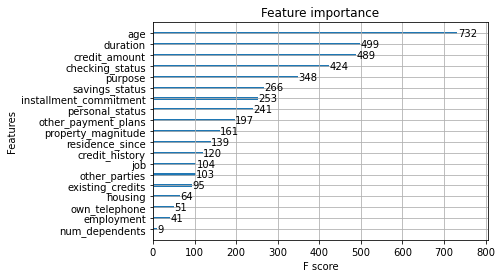

In [677]:
clf1= xgb.XGBClassifier(objective='reg:logistic',seed=36,max_depth=5, n_estimators=200)
clf1.fit(X_train,y_train)
xgb.plot_importance(clf1)

In [678]:
"""from sklearn.feature_selection import RFECV
selector=RFECV(clf1,cv=5)
selector.fit(X_train,y_train)
print(selector.support_)
print(X_train.columns)"""

'from sklearn.feature_selection import RFECV\nselector=RFECV(clf1,cv=5)\nselector.fit(X_train,y_train)\nprint(selector.support_)\nprint(X_train.columns)'

In [679]:
#drop_col=['foreign_worker','num_dependents','housing','residence_since','other_parties','job','installment_commitment','credit_history']
test_data=test_data
#test_data=test_data[col_need]
test_predict=clf1.predict(test_data)
test_data['prediction']=test_predict

test_data['prediction']=lenc.inverse_transform(test_data['prediction'])


test_data['prediction'].to_csv('loanapplication.csv',index=False)